<a href="https://colab.research.google.com/github/AnthonyGachuru/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/AnthonyG_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# TODO - code!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
def prob_drunk_given_positive(prob_drunk_prior = 0.001, prob_positive = 0.01, prob_positive_drunk = 0.99):
  
  prob_drunk = (prob_positive_drunk * prob_drunk_prior) / ((prob_positive_drunk * prob_drunk_prior) + (prob_positive * (1-prob_drunk_prior)))
  
                                                           
  return prob_drunk

                                                           
                                                         

In [37]:
prob_drunk_given_positive()                                                           

0.09016393442622951

In [38]:
prob_drunk_given_positive(prob_drunk_given_positive())

0.9075000000000001

In [39]:
prob_drunk_given_positive(prob_drunk_given_positive(prob_drunk_given_positive()))

0.9989714794017902

## Resources

In [40]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header = None, 
                names=['party','handicapped-infants','water-project',
                      'budget', 'physician-fee-freeze','el-salvador',
                      'religion-groups','anti-satellite-ban',
                      'aid-to-contras','mx-missile','immigration',
                      'synfuels','education','right-to-sue','crime','duty-free',
                      'south-africa'], na_values='?')

df = df.replace({'y': 0, 'n': 1})
df.head(3)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador,religion-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0
1,republican,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN
2,democrat,NaN,0.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

In [0]:
republicans = df[df.party == 'republican']
democrats = df[df.party == 'democrat']

In [45]:
immigrationdem = democrats['immigration'].dropna()
bmean, _, _ = stats.bayes_mvs(immigrationdem)
print(bmean)



Mean(statistic=0.5285171102661597, minmax=(0.47761011739702636, 0.5794241031352929))


In [43]:
frequentistmean = np.mean(immigrationdem)
print(frequentistmean)

0.5285171102661597


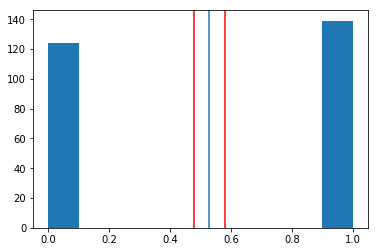

In [55]:
plt.hist(immigrationdem)
plt.axvline(x = bmean.minmax[0], color = 'r', label = 'Bayesian lower bound')
plt.axvline(x = bmean.minmax[1], color = 'r', label = 'Bayesian upper bound')
plt.axvline(x = frequentistmean, label = 'Mean')